# **1. Perkenalan Dataset**


Dataset yang saya gunakan adalah [Customer Personality Analysis](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis) dari Kaggle.

Dataset ini digunakan untuk menganalisa bagaimana interaksi pelanggan dengan perusahaan, mulai dari kapan pelanggan terakhir kali membeli hingga bagaimana pelanggan berinteraksi dengan kampanye marketing.

# **2. Import Library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import math

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

pd.options.mode.copy_on_write = True

# **3. Memuat Dataset**

In [2]:
df = pd.read_csv('dataset/marketing_campaign.csv', sep='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


### Columns Explanation

**People**
- ID: Identifikasi Unik pelanggan
- Year_Birth: Tahun kelahiran pelanggan
- Education: Tingkat pendidikan pelanggan
- Marital_Status: Status pernikahan pelanggan
- Income: Pendapatan rumah tangga tahunan pelanggan
- Kidhome: Jumlah anak di rumah tangga pelanggan
- Teenhome: Jumlah remaja di rumah tangga pelanggan
- Dt_Customer: Tanggal pelanggan bergabung dengan perusahaan
- Recency: Jumlah hari sejak pembelian terakhir pelanggan
- Complain: 1 jika pelanggan mengajukan keluhan dalam 2 tahun terakhir, 0 jika tidak

**Products**
- MntWines: Jumlah yang dihabiskan untuk anggur dalam 2 tahun terakhir
- MntFruits: Jumlah yang dihabiskan untuk buah-buahan dalam 2 tahun terakhir
- MntMeatProducts: Jumlah yang dihabiskan untuk daging dalam 2 tahun terakhir
- MntFishProducts: Jumlah yang dihabiskan untuk ikan dalam 2 tahun terakhir
- MntSweetProducts: Jumlah yang dihabiskan untuk permen dalam 2 tahun terakhir
- MntGoldProds: Jumlah yang dihabiskan untuk emas dalam 2 tahun terakhir

**Promotion**
- NumDealsPurchases: Jumlah pembelian yang dilakukan dengan diskon
- AcceptedCmp1: 1 jika pelanggan menerima tawaran pada 1st kampanye, 0 jika tidak
- AcceptedCmp2: 1 jika pelanggan menerima tawaran pada 2nd kampanye, 0 jika tidak
- AcceptedCmp3: 1 jika pelanggan menerima tawaran pada 3rd kampanye, 0 jika tidak
- AcceptedCmp4: 1 jika pelanggan menerima tawaran pada 4th kampanye, 0 jika tidak
- AcceptedCmp5: 1 jika pelanggan menerima tawaran pada 5th kampanye, 0 jika tidak
- Response: 1 jika pelanggan menerima tawaran pada last kampanye, 0 jika tidak

**Place**
- NumWebPurchases: Jumlah pembelian yang dilakukan melalui situs web perusahaan
- NumCatalogPurchases: Jumlah pembelian yang dilakukan menggunakan katalog
- NumStorePurchases: Jumlah pembelian yang dilakukan langsung di toko
- NumWebVisitsMonth: Jumlah kunjungan ke situs web perusahaan dalam sebulan terakhir

**People**
- ID: Identifikasi Unik pelanggan
- Year_Birth: Tahun kelahiran pelanggan
- Education: Tingkat pendidikan pelanggan
- Marital_Status: Status pernikahan pelanggan
- Income: Pendapatan rumah tangga tahunan pelanggan
- Kidhome: Jumlah anak di rumah tangga pelanggan
- Teenhome: Jumlah remaja di rumah tangga pelanggan
- Dt_Customer: Tanggal pelanggan bergabung dengan perusahaan
- Recency: Jumlah hari sejak pembelian terakhir pelanggan
- Complain: 1 jika pelanggan mengajukan keluhan dalam 2 tahun terakhir, 0 jika tidak

**Products**
- MntWines: Jumlah yang dihabiskan untuk anggur dalam 2 tahun terakhir
- MntFruits: Jumlah yang dihabiskan untuk buah-buahan dalam 2 tahun terakhir
- MntMeatProducts: Jumlah yang dihabiskan untuk daging dalam 2 tahun terakhir
- MntFishProducts: Jumlah yang dihabiskan untuk ikan dalam 2 tahun terakhir
- MntSweetProducts: Jumlah yang dihabiskan untuk permen dalam 2 tahun terakhir
- MntGoldProds: Jumlah yang dihabiskan untuk emas dalam 2 tahun terakhir

**Promotion**
- NumDealsPurchases: Jumlah pembelian yang dilakukan dengan diskon
- AcceptedCmp1: 1 jika pelanggan menerima tawaran pada 1st campaign, 0 jika tidak
- AcceptedCmp2: 1 jika pelanggan menerima tawaran pada 2nd campaign, 0 jika tidak
- AcceptedCmp3: 1 jika pelanggan menerima tawaran pada 3rd campaign, 0 jika tidak
- AcceptedCmp4: 1 jika pelanggan menerima tawaran pada 4th campaign, 0 jika tidak
- AcceptedCmp5: 1 jika pelanggan menerima tawaran pada 5th campaign, 0 jika tidak
- Response: 1 jika pelanggan menerima tawaran pada last campaign, 0 jika tidak

**Place**
- NumWebPurchases: Jumlah pembelian yang dilakukan melalui situs web perusahaan
- NumCatalogPurchases: Jumlah pembelian yang dilakukan menggunakan katalog
- NumStorePurchases: Jumlah pembelian yang dilakukan langsung di toko
- NumWebVisitsMonth: Jumlah kunjungan ke situs web perusahaan dalam sebulan terakhir

# **4. Exploratory Data Analysis (EDA)**

## Assessing Data

Disini kita akan melakukan pemeriksaan dan penilaian terhadap data, mulai dari besar hingga data yang hilang.

In [3]:
df.shape

(2240, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Terdapat **2240 baris** dan **29 kolom**.

In [5]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Terdapat **24 data** yang kosong di kolom `Income`.

In [6]:
df.duplicated().sum()

np.int64(0)

Tidak ada data yang duplikat.

In [7]:
df.describe(include='int64').transpose()

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0


Kolom `Z_CostContact` dan `Z_Revenue` memiliki value yang tampak aneh. Mari kita lihat terlebih dahulu

In [8]:
df.Z_CostContact.value_counts()

Z_CostContact
3    2240
Name: count, dtype: int64

In [9]:
df.Z_Revenue.value_counts()

Z_Revenue
11    2240
Name: count, dtype: int64

Kolom `Z_CostContact` dan `Z_Revenue` memiliki value yang **konstan** yang berarti tidak memiliki pengaruh pada data.

#### Insight:
- Terdapat **2240 baris** dan **29 kolom**.
- Terdapat **24 data** yang kosong di kolom `Income`.
- **Tidak ada** data yang duplikat.
- Kolom `ID` **tidak relevan** terhadap dataset.
- Kolom `Dt_Customer` masih bertipe **object**.
- Kolom `Z_CostContact` dan `Z_Revenue` memiliki value yang **konstan**.

## Cleaning Data

In [10]:
df = df.dropna()
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [11]:
df.Dt_Customer = pd.to_datetime(df.Dt_Customer, format='%d-%m-%Y')
df.Dt_Customer

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2216, dtype: datetime64[ns]

In [12]:
df = df.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'])
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,3,4,5,0,0,0,0,0,0,0
2236,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,...,2,5,7,0,0,0,1,0,0,0
2237,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,3,13,6,0,1,0,0,0,0,0
2238,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,...,5,10,3,0,0,0,0,0,0,0


In [13]:
df.shape

(2216, 26)

Sekarang data hanya memiliki **2216 baris** dan **26 kolom**.

## Visualizing Data

In [14]:
product_columns  = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
purchase_columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
child_columns    = ['Kidhome', 'Teenhome']
df_numeric       = df.select_dtypes(include=['int64', 'float64'])

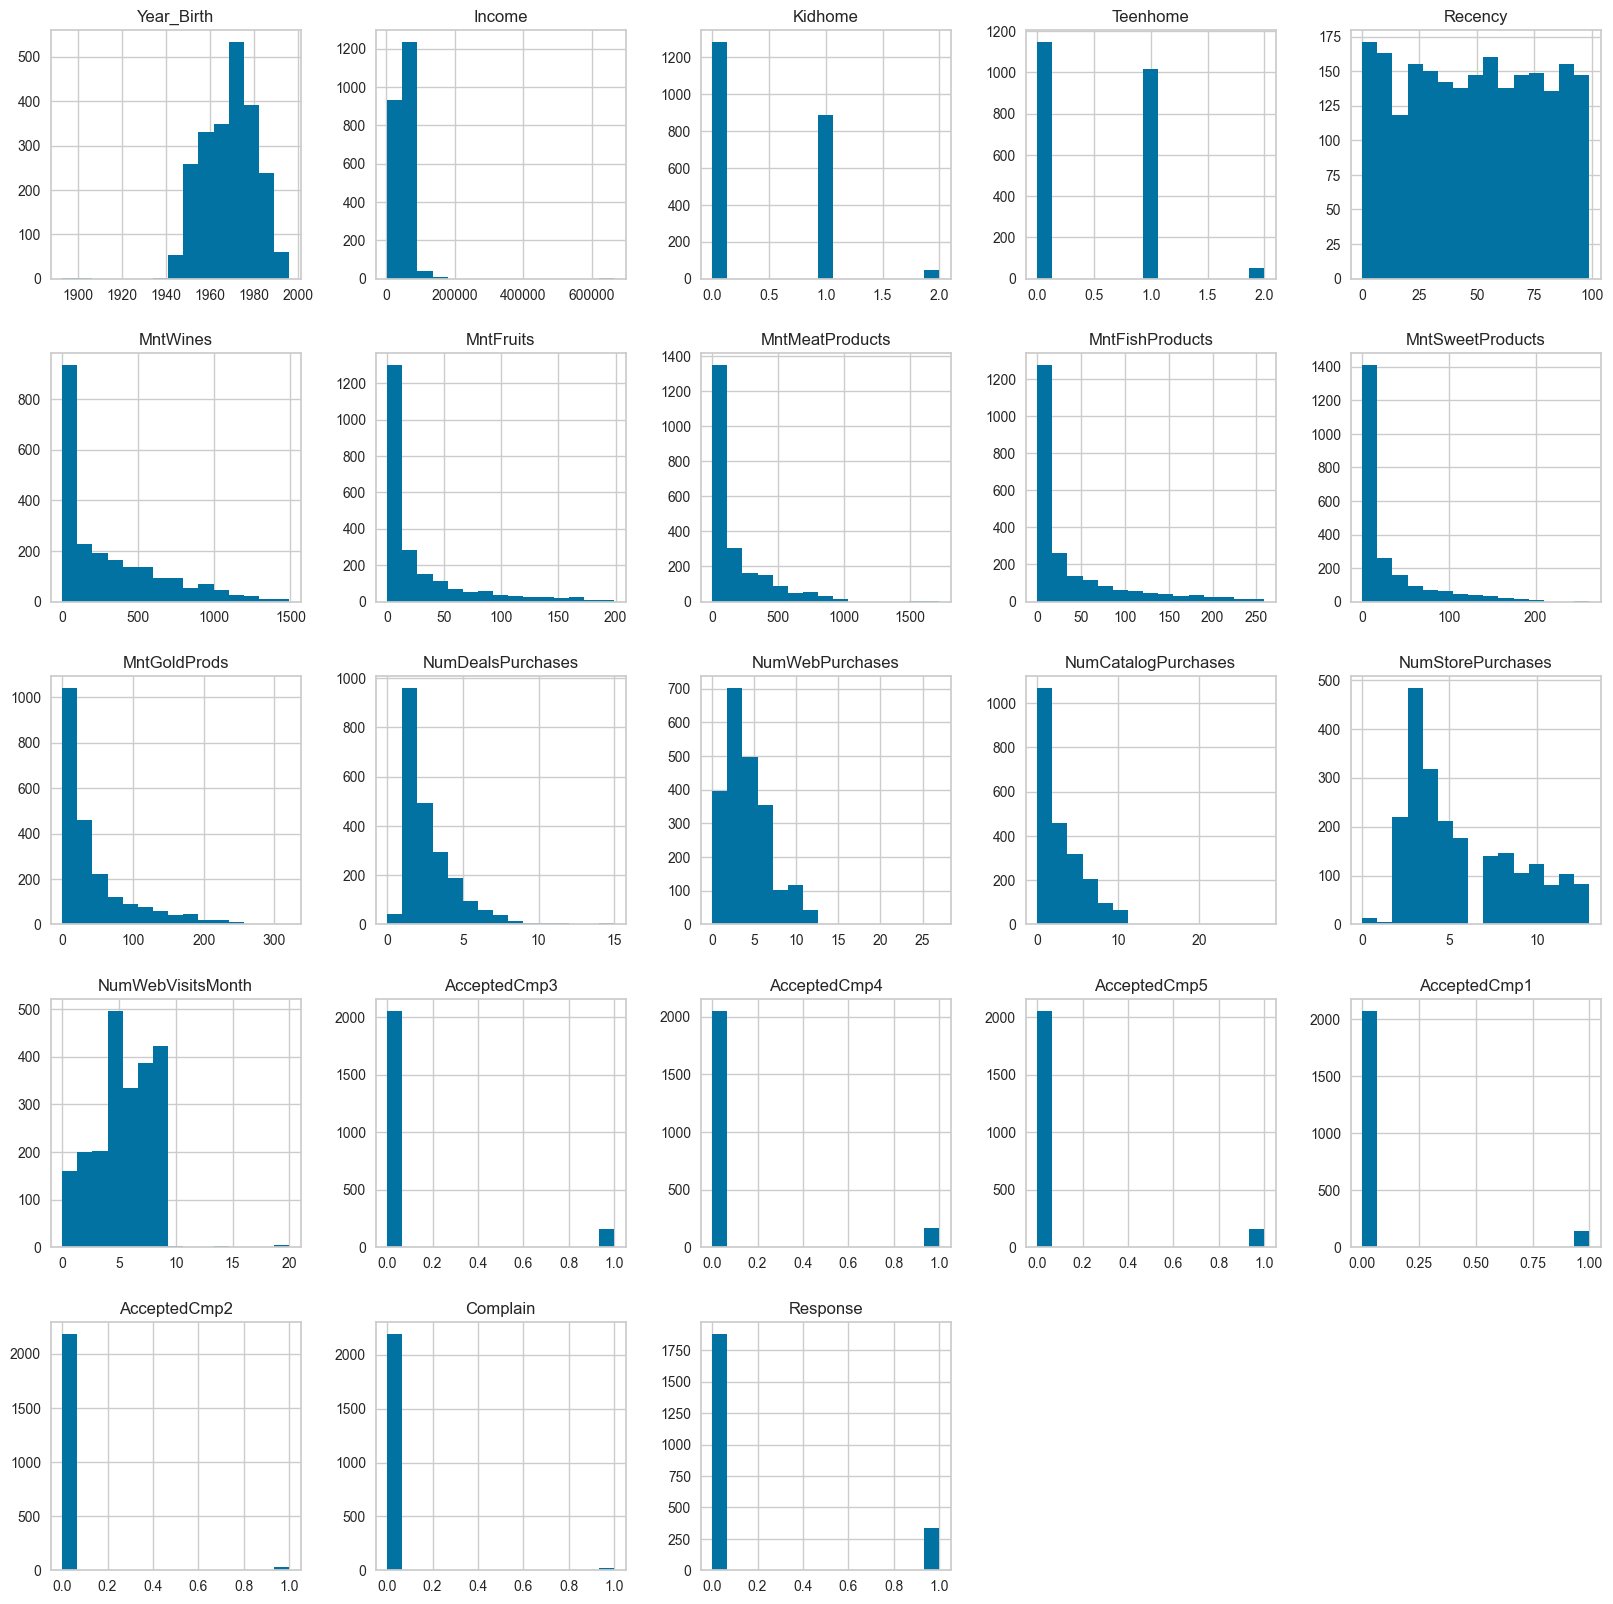

In [15]:
df_numeric.hist(bins=15, figsize=[20, 20])
plt.show()

Ada beberapa hal menarik yang kita temukan disini:
1. Mayoritas kolom memiliki **positive skewed** yang mana distribusi besar diawal tetapi kecil diakhir.
2. `Year_Birth`: Mayoritas adalah orang yang lahir sebelum tahun `1975`.
3. `Income`: Mayoritas (mendekati 100%) pelanggan memiliki pendapatan kurang dari `100000`.
4. Mayoritas pelanggan menerima tawaran campaign, mulai dari `AcceptedCmp1` sampai `Response`, walaupun penolakan meningkat tiap campaign.
5. `Complain`: Sedikit orang yang mengajukan keluhan.

Dan masih banyak lagi.

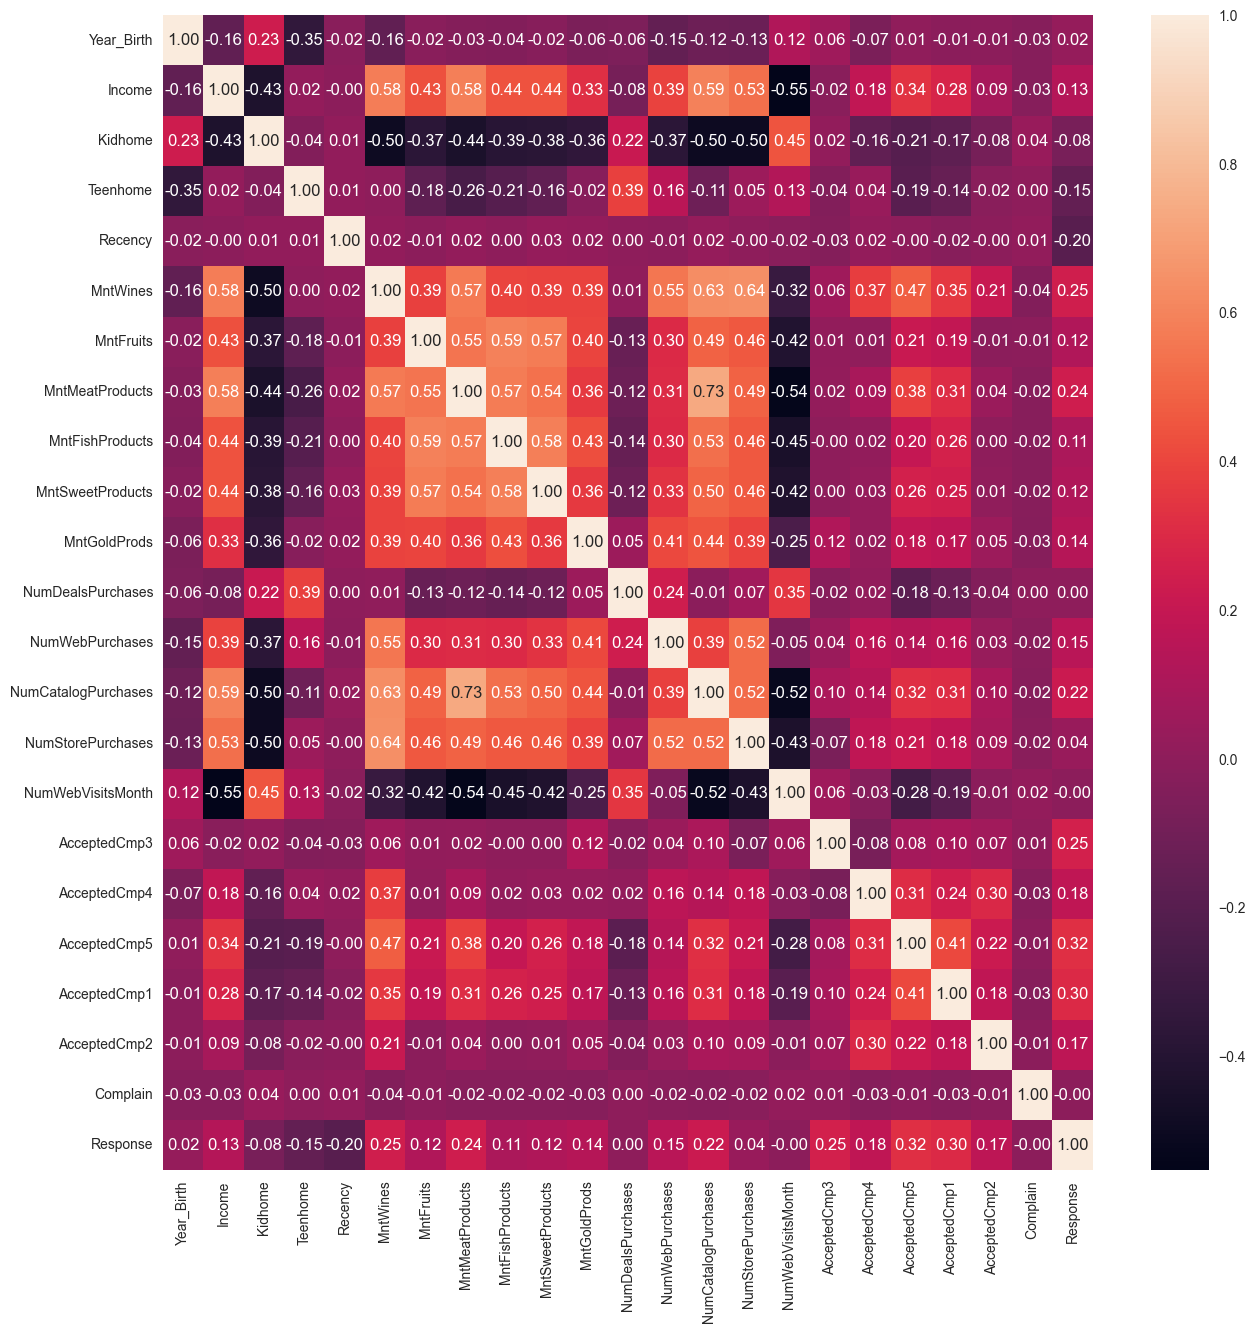

In [16]:
plt.figure(figsize=[15, 15])
sns.heatmap(df_numeric.corr(), annot=True, fmt='.2f')
plt.show()

Ada beberapa hal menarik yang kita temukan dengan korelasi antar kolom, seperti:
1. `Income`: **berkorelasi positif** dengan semua kolom produk dan **berkorelasi negatif** dengan kolom `Kidhome` dan `NumWebVisitsMonth`.
2. `Kidhome`: **berkorelasi negatif** dengan semua kolom produk dan **berkorelasi positif** dengan kolom `NumWebVisitsMonth`.
3. `NumWebVisitsMonth`: **berkorelasi negatif** dengan semua kolom produk.
4. Kolom yang memiliki korelasi **tertinggi** ada pada kolom `MntProducts` dengan kolom `NumCatalogPurchases` yang mencapai `0.73`.
5. `Complain`: **tidak memiliki korelasi** dengan kolom lain.

Dan masih banyak lagi.

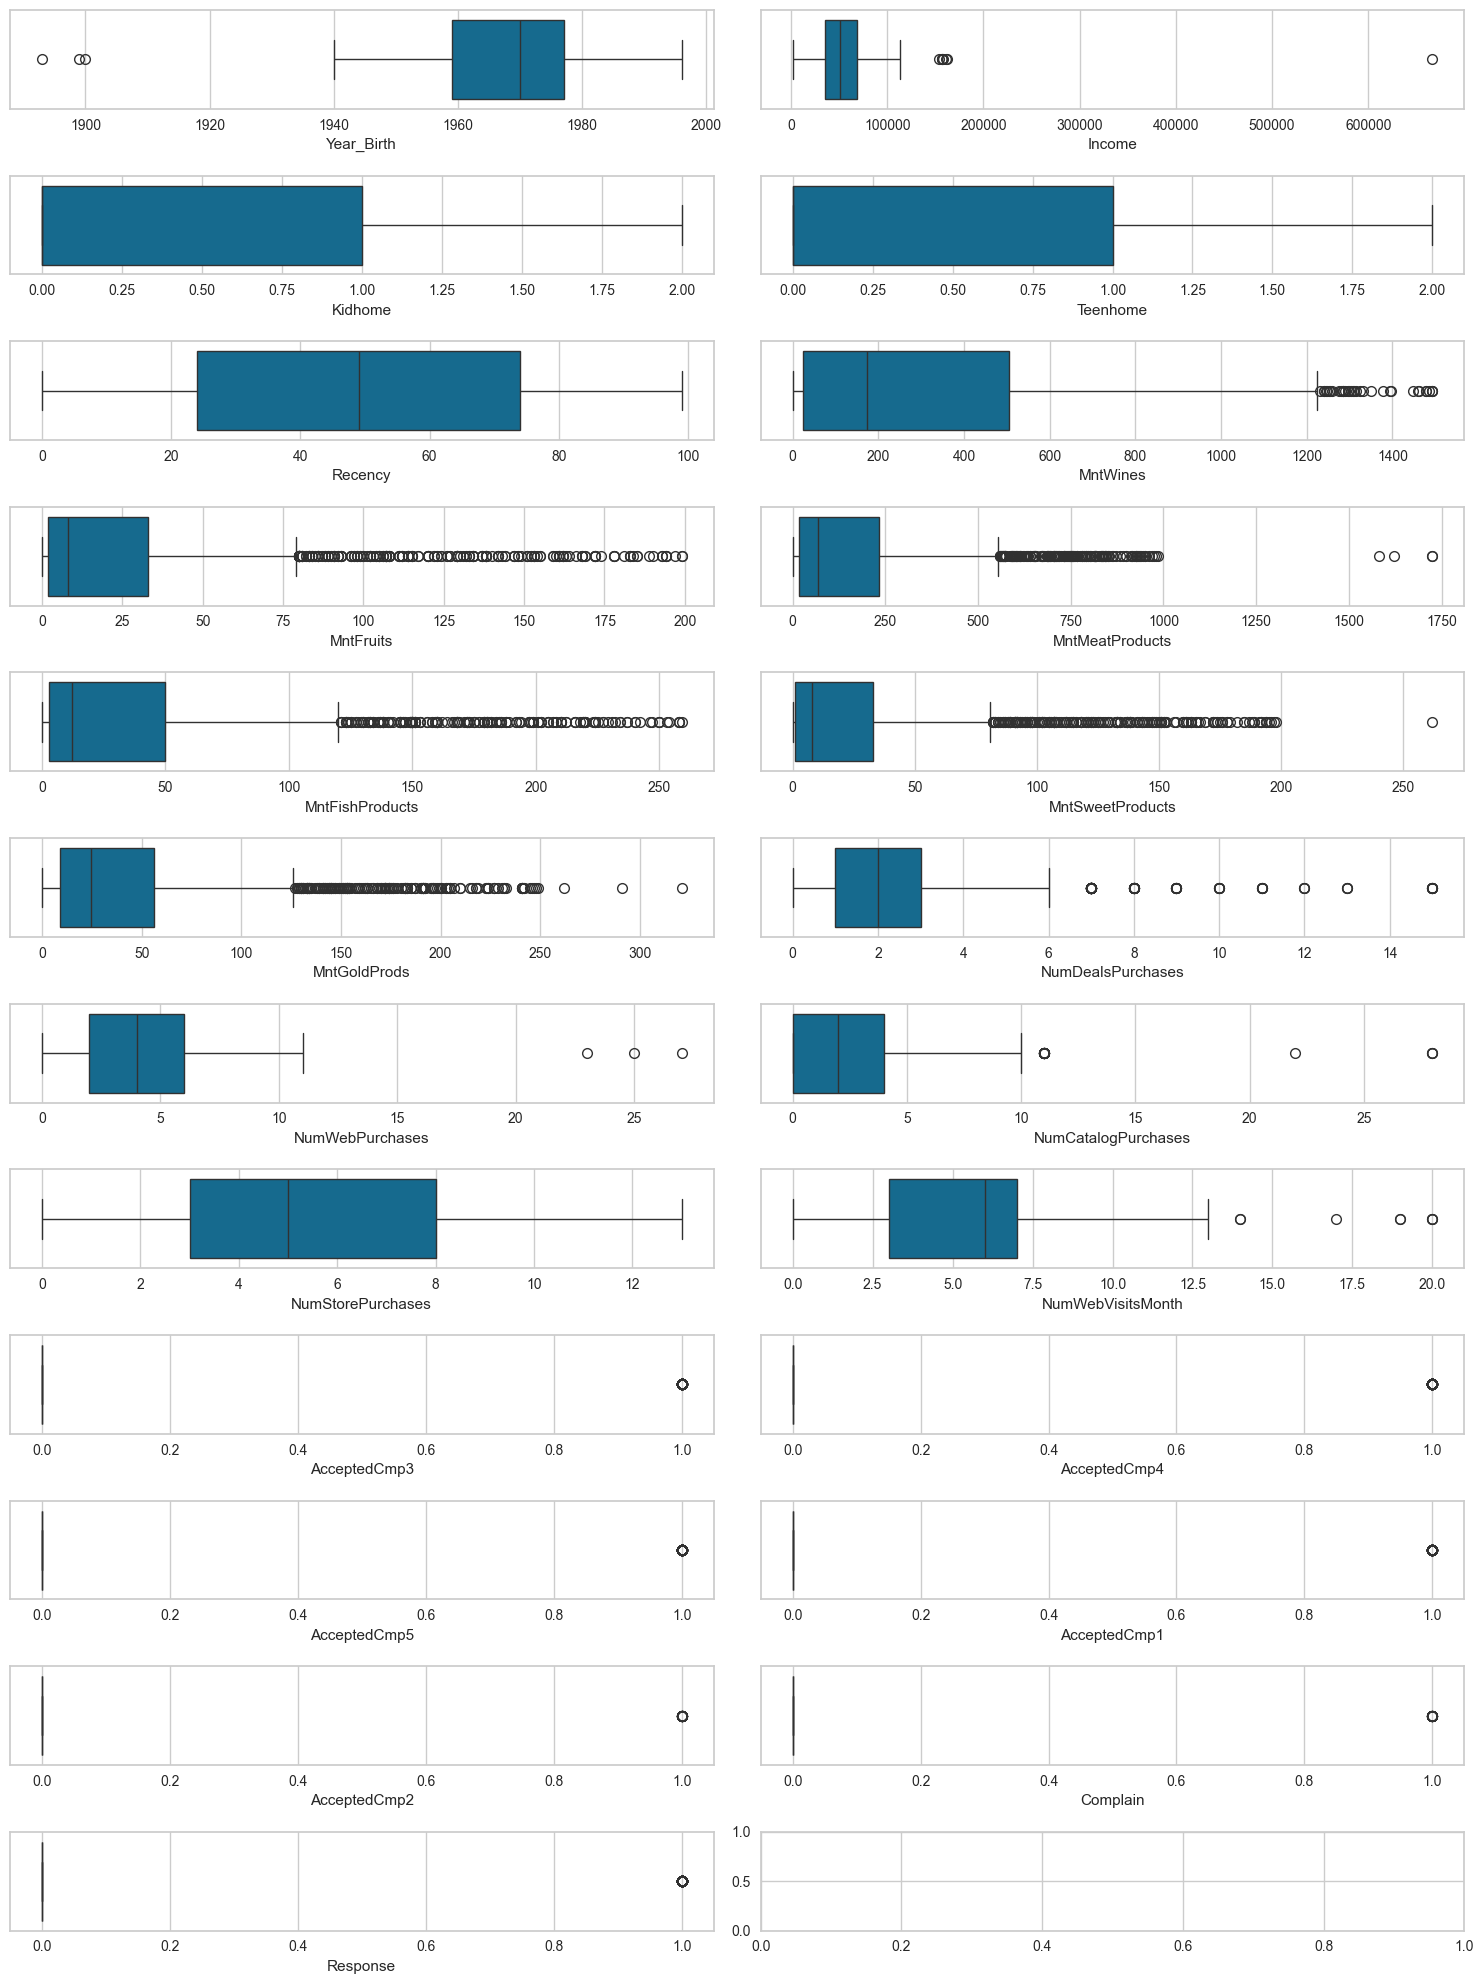

In [17]:
numeric_columns = df_numeric.columns
fig, ax = plt.subplots(nrows=math.ceil(len(numeric_columns) / 2), ncols=2, figsize=[15, 20])

for i, col in enumerate(numeric_columns):
    sns.boxplot(x=df[col], ax=ax[math.floor(i / 2)][i % 2])
    plt.tight_layout()
plt.show()

Ada beberapa outlier yang terlihat disini, tapi yang paling terlihat adalah kolom `Income` dan `MntMeatProducts`.

### Education

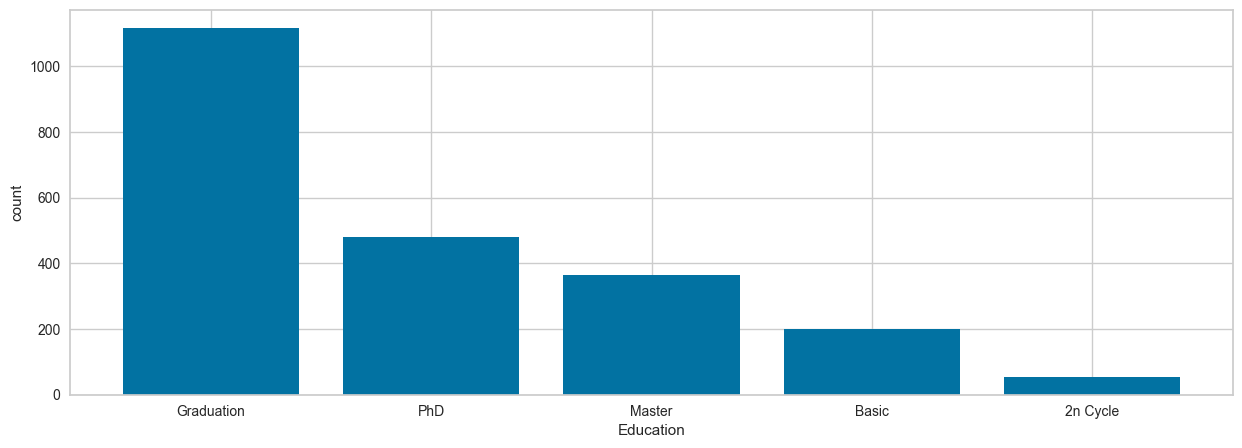

In [18]:
plt.figure(figsize=[15, 5])
plt.bar(df.Education.unique(), df.Education.value_counts())
plt.xlabel('Education')
plt.ylabel('count')
plt.show()

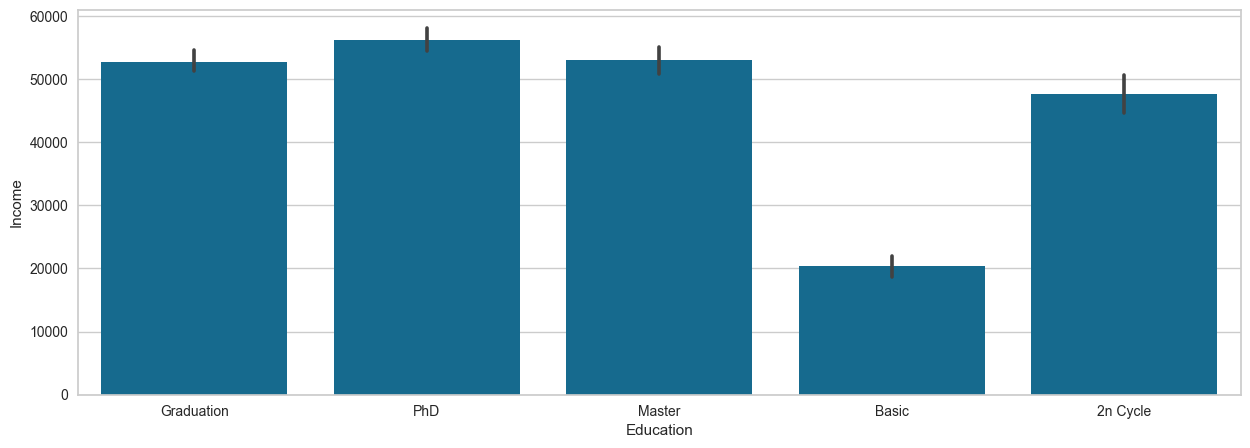

In [19]:
plt.figure(figsize=[15, 5])
sns.barplot(x='Education', y='Income', data=df)
plt.show()

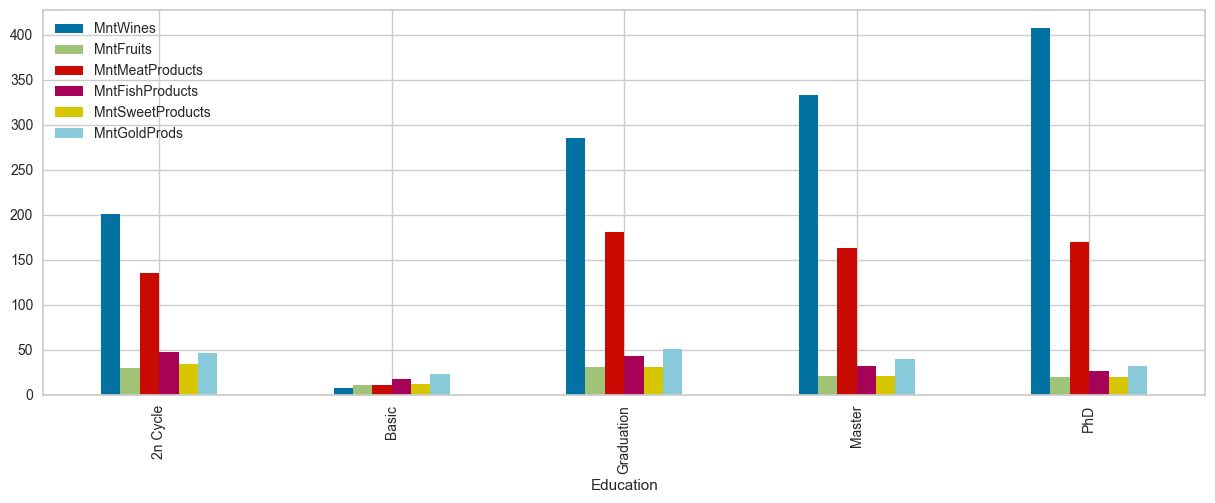

In [20]:
df.groupby('Education')[product_columns].mean().plot(kind='bar', figsize=[15, 5])
plt.show()

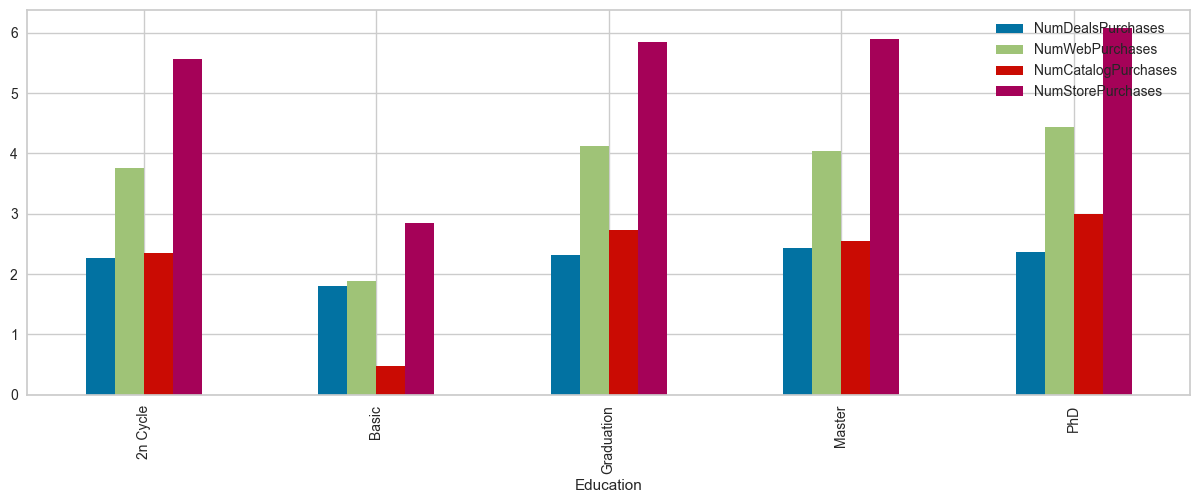

In [21]:
df.groupby('Education')[purchase_columns].mean().plot(kind='bar', figsize=[15, 5])
plt.show()

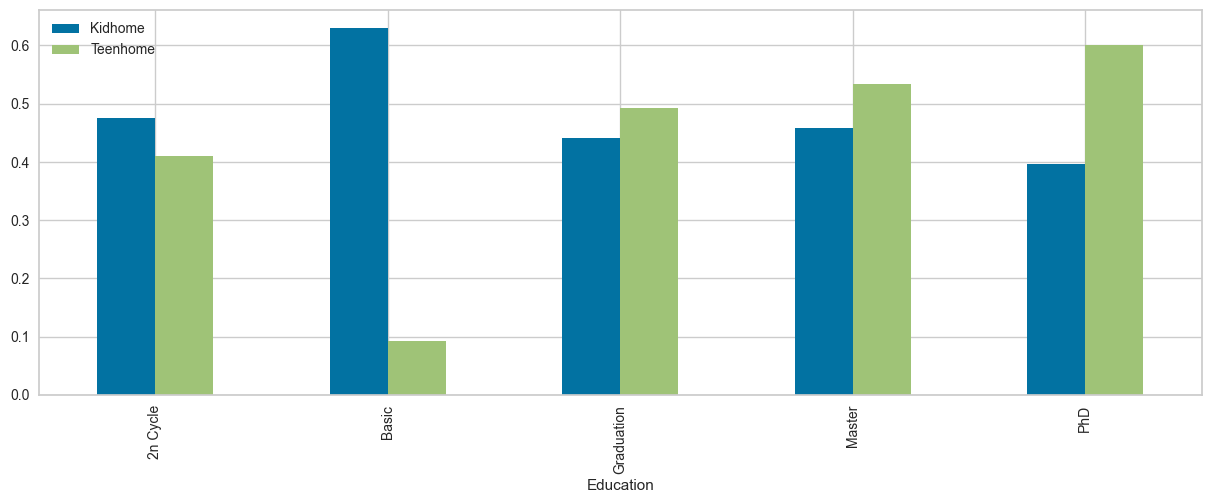

In [22]:
df.groupby('Education')[child_columns].mean().plot(kind='bar', figsize=[15, 5])
plt.show()

Dari analisa yang kita lakukan, kita mendapatkan bahwa:
1. Pendidikan **terbanyak** ialah `Graduation` dan **tersedikit** ialah `2nd Cycle`.
2. Pendapatan **terendah** berada pada pendidikan `Basic` dan **tertinggi** pada pendidikan `PhD`.
3. Pendidikan `Basic` memiliki kemungkinan mempunyai anak kecil lebih tinggi daripada yang lainnya, tetapi hal tersebut berbanding terbalik untuk anak remaja.
4. Dikarenakan pendapatan yang rendah, maka pendidikan `Basic` paling sedikit untuk melakukan pembelian, hal tersebut juga berlaku pada pendidikan dengan pendapatan tertinggi yaitu `PhD` yang melakukan pembelian lebih banyak.

### Marital_Status

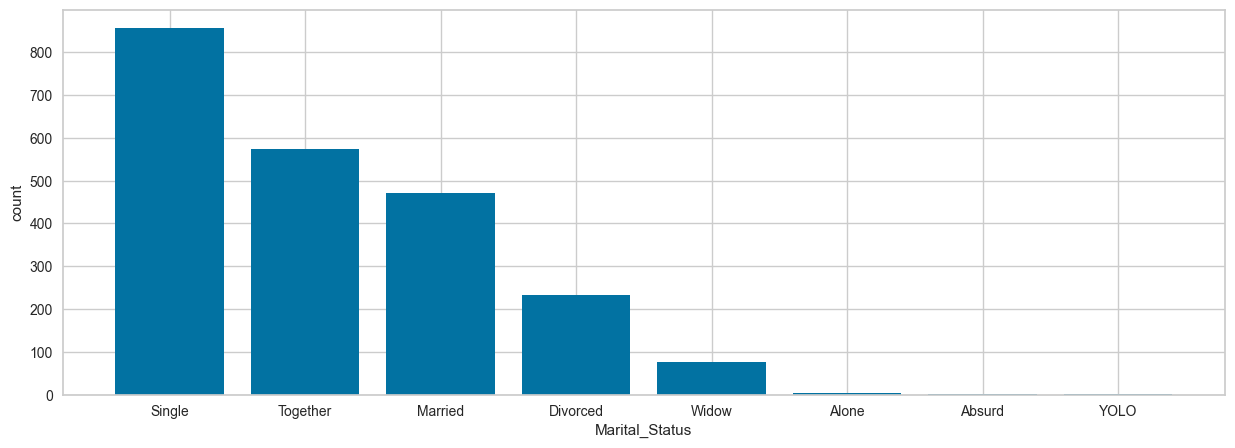

In [23]:
plt.figure(figsize=[15, 5])
plt.bar(df.Marital_Status.unique(), df.Marital_Status.value_counts())
plt.xlabel('Marital_Status')
plt.ylabel('count')
plt.show()

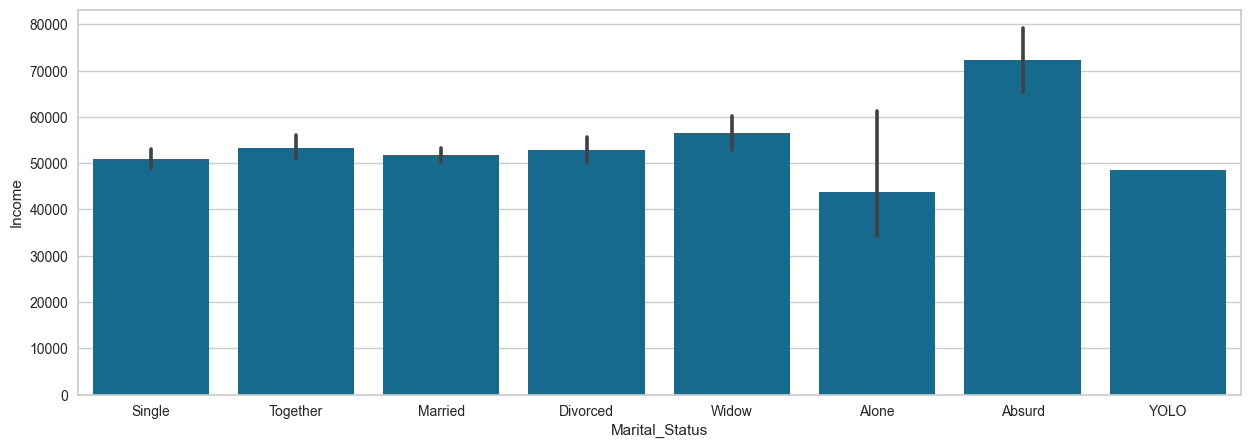

In [24]:
plt.figure(figsize=[15, 5])
sns.barplot(x='Marital_Status', y='Income', data=df)
plt.show()

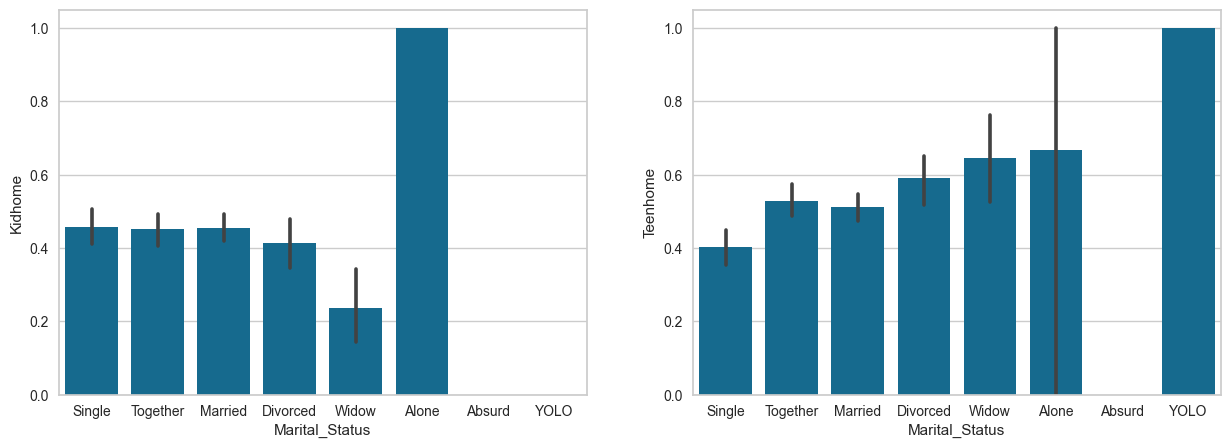

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[15,5])
sns.barplot(x='Marital_Status', y='Kidhome', data=df, ax=ax[0])
sns.barplot(x='Marital_Status', y='Teenhome', data=df, ax=ax[1])
plt.show()

In [26]:
df.groupby('Marital_Status').Kidhome.value_counts()

Marital_Status  Kidhome
Absurd          0            2
Alone           1            3
Divorced        0          140
                1           88
                2            4
Married         0          488
                1          349
                2           20
Single          0          266
                1          195
                2           10
Together        0          327
                1          234
                2           12
Widow           0           58
                1           18
YOLO            0            2
Name: count, dtype: int64

In [27]:
df.groupby('Marital_Status').Teenhome.value_counts()

Marital_Status  Teenhome
Absurd          0             2
Alone           1             2
                0             1
Divorced        1           125
                0           101
                2             6
Married         0           441
                1           394
                2            22
Single          0           291
                1           171
                2             9
Together        0           283
                1           277
                2            13
Widow           1            47
                0            28
                2             1
YOLO            1             2
Name: count, dtype: int64

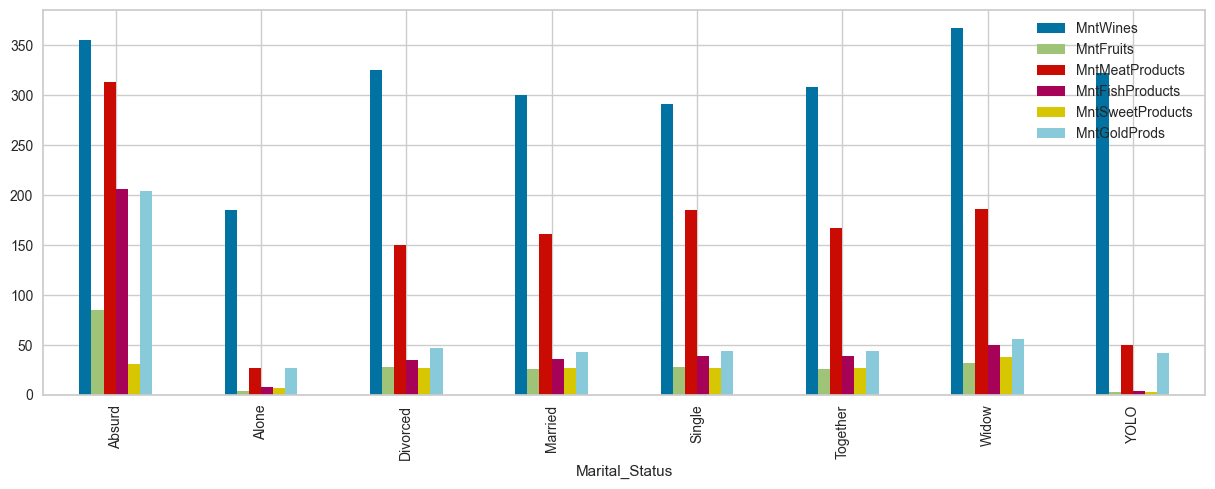

In [28]:
df.groupby('Marital_Status')[product_columns].mean().plot(kind='bar', figsize=[15, 5])
plt.show()

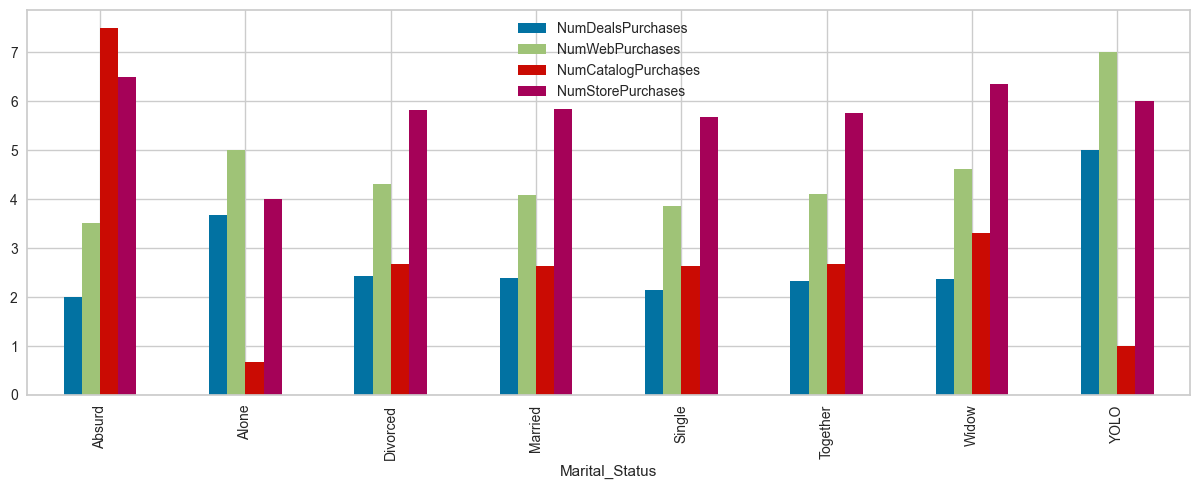

In [29]:
df.groupby('Marital_Status')[purchase_columns].mean().plot(kind='bar', figsize=[15, 5])
plt.show()

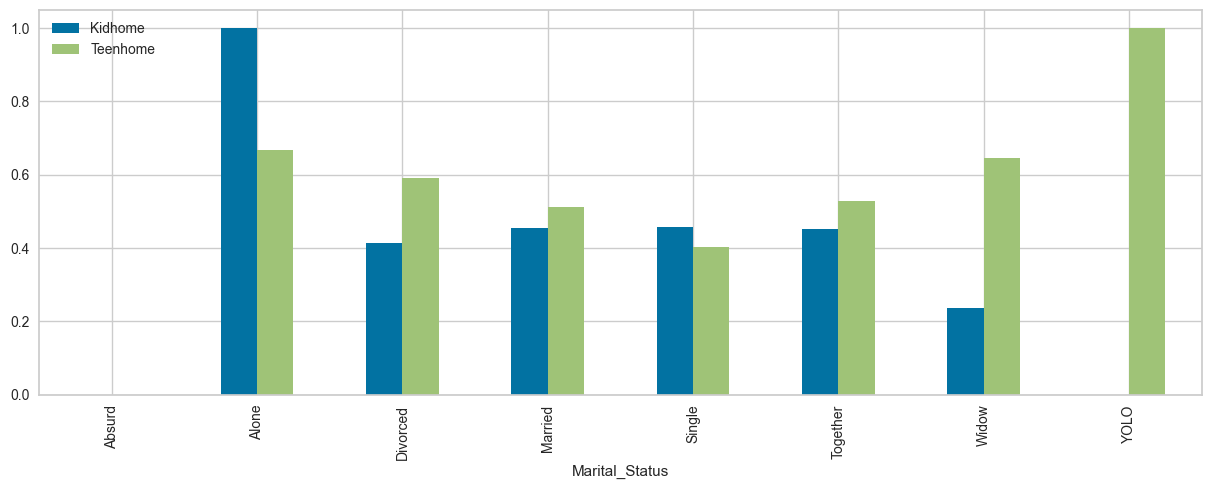

In [30]:
df.groupby('Marital_Status')[child_columns].mean().plot(kind='bar', figsize=[15, 5])
plt.show()

Dari analisa yang kita lakukan, kita mendapatkan bahwa:
1. Status hubungan **terbanyak** ialah `Single` dan **tersedikit** ialah `Yolo` dan `Absurd`.
2. Terdapat hubungan yang tidak jelas statusnya seperti `Absurd` dan `Yolo`.
3. Pendapatan **terendah** berada pada status hubungan `Alone` dan **tertinggi** pada status hubungan `Absurd`, dengan catatan bahwa status hubungan tersebut memiliki data paling sedikit.
4. Setiap status hubungan `Alone` memiliki jumlah anak kecil 1 dan setiap status hubungan `Absurd` tidak memiliki anak sama sekali, dengan catatan bahwa status hubungan tersebut memiliki data paling sedikit.
5. Dikarenakan tersebarnya data status hubungan dan membuatnya menjadi bias, maka data tersebut akan diubah menjadi `Single` dan `In Relation`.

# **5. Data Preprocessing**

## Transforming

Pertama kita akan mengubah data tanggal `Dt_Customer` menjadi jumlah hari.

In [31]:
df_transformed = df.copy()

In [32]:
last_date = df.Dt_Customer.max()
df_transformed['Total_Day'] = df.Dt_Customer.apply(lambda x: (last_date - x).days)
df_transformed = df_transformed.drop(columns=['Dt_Customer'])
df_transformed

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Day
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,4,7,0,0,0,0,0,0,1,663
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,2,5,0,0,0,0,0,0,0,113
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,10,4,0,0,0,0,0,0,0,312
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,4,6,0,0,0,0,0,0,0,139
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,6,5,0,0,0,0,0,0,0,161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,46,709,43,182,...,4,5,0,0,0,0,0,0,0,381
2236,1946,PhD,Together,64014.0,2,1,56,406,0,30,...,5,7,0,0,0,1,0,0,0,19
2237,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,13,6,0,1,0,0,0,0,0,155
2238,1956,Master,Together,69245.0,0,1,8,428,30,214,...,10,3,0,0,0,0,0,0,0,156


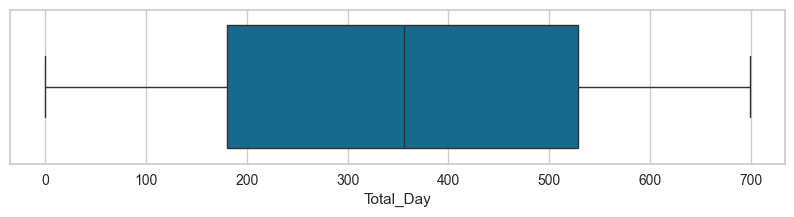

In [33]:
plt.figure(figsize=[10, 2])
sns.boxplot(x=df_transformed.Total_Day)
plt.show()

**Tidak terdapat outlier** pada `Total_Day` seperti yang terlihat di gambar.

## Combining

Kemudian kita akan menggabungkan kolom produk menjadi `Total_Spent`, kolom purchase menjadi `Total_Purchase`, kolom kampanye menjadi `Total_Campaign`,  dan kolom anak-anak menjadi `Total_Child`.

In [34]:
df_combined = df_transformed.copy()

In [35]:
df_combined['Total_Spent'] = np.zeros(df_combined.shape[0])
for col in product_columns:
    df_combined.Total_Spent += df_combined[col]
df_combined.Total_Spent

0       1617.0
1         27.0
2        776.0
3         53.0
4        422.0
         ...  
2235    1341.0
2236     444.0
2237    1241.0
2238     843.0
2239     172.0
Name: Total_Spent, Length: 2216, dtype: float64

In [36]:
df_combined['Total_Cmp'] = np.zeros(df_combined.shape[0])
for col in campaign_columns:
    df_combined.Total_Cmp += df_combined[col]
df_combined.Total_Cmp

0       1.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2235    0.0
2236    1.0
2237    1.0
2238    0.0
2239    1.0
Name: Total_Cmp, Length: 2216, dtype: float64

In [37]:
df_combined['Total_Purchase'] = np.zeros(df_combined.shape[0])
for col in purchase_columns:
    df_combined.Total_Purchase += df_combined[col]
df_combined.Total_Purchase

0       25.0
1        6.0
2       21.0
3        8.0
4       19.0
        ... 
2235    18.0
2236    22.0
2237    19.0
2238    23.0
2239    11.0
Name: Total_Purchase, Length: 2216, dtype: float64

In [38]:
df_combined['Total_Child'] = np.zeros(df_combined.shape[0])
for col in child_columns:
    df_combined.Total_Child += df_combined[col]
df_combined.Total_Child

0       0.0
1       2.0
2       0.0
3       1.0
4       1.0
       ... 
2235    1.0
2236    3.0
2237    0.0
2238    1.0
2239    2.0
Name: Total_Child, Length: 2216, dtype: float64

In [39]:
df_combined = df_combined.drop(columns=[*product_columns, *purchase_columns, *campaign_columns, *child_columns])
df_combined

,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Day,Total_Spent,Total_Cmp,Total_Purchase,Total_Child
0,1957,Graduation,Single,58138.0,58,7,0,663,1617.0,1.0,25.0,0.0
1,1954,Graduation,Single,46344.0,38,5,0,113,27.0,0.0,6.0,2.0
2,1965,Graduation,Together,71613.0,26,4,0,312,776.0,0.0,21.0,0.0
3,1984,Graduation,Together,26646.0,26,6,0,139,53.0,0.0,8.0,1.0
4,1981,PhD,Married,58293.0,94,5,0,161,422.0,0.0,19.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,46,5,0,381,1341.0,0.0,18.0,1.0
2236,1946,PhD,Together,64014.0,56,7,0,19,444.0,1.0,22.0,3.0
2237,1981,Graduation,Divorced,56981.0,91,6,0,155,1241.0,1.0,19.0,0.0
2238,1956,Master,Together,69245.0,8,3,0,156,843.0,0.0,23.0,1.0


## Grouping

Kemudian kita akan menyederhanakan status hubungan menjadi 2 saja.

In [40]:
df_grouped = df_combined.copy()

In [41]:
df_grouped.Marital_Status = df_combined.Marital_Status.apply(lambda x: 'In Relation' if x in ['Married', 'Together'] else 'Single')
df_grouped.Marital_Status

0            Single
1            Single
2       In Relation
3       In Relation
4       In Relation
           ...     
2235    In Relation
2236    In Relation
2237         Single
2238    In Relation
2239    In Relation
Name: Marital_Status, Length: 2216, dtype: object

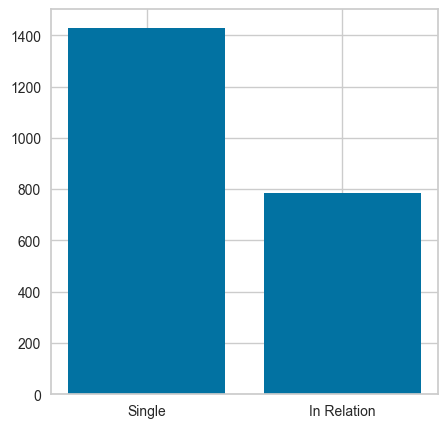

In [42]:
plt.figure(figsize=[5, 5])
plt.bar(df_grouped.Marital_Status.unique(), df_grouped.Marital_Status.value_counts())
plt.show()

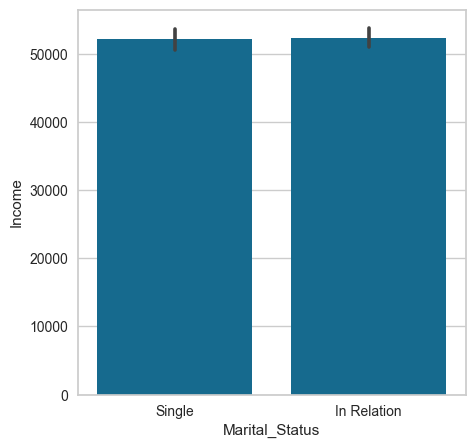

In [43]:
plt.figure(figsize=[5, 5])
sns.barplot(x='Marital_Status', y='Income', data=df_grouped)
plt.show()

## Outlier Handling

Kemudian kita bersihkan data yang tidak memiliki skala yang pasti.

In [44]:
df_cleaned   = df_grouped.copy()
need_handled = ['Income', 'Year_Birth', 'NumWebVisitsMonth', 'Total_Spent', 'Total_Purchase'] # Untuk Recency dan Total_Day tidak terdapat outlier

In [45]:
outlier_mask = pd.Series(False, index=df.index)

for col in need_handled:  # Hanya untuk kolom numerik
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Tandai baris yang memiliki outlier
    outlier_mask |= (df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)

df_cleaned = df_cleaned[~outlier_mask]

In [46]:
df_cleaned = df_cleaned.reset_index(drop=True)
df_cleaned

,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Day,Total_Spent,Total_Cmp,Total_Purchase,Total_Child
0,1957,Graduation,Single,58138.0,58,7,0,663,1617.0,1.0,25.0,0.0
1,1954,Graduation,Single,46344.0,38,5,0,113,27.0,0.0,6.0,2.0
2,1965,Graduation,In Relation,71613.0,26,4,0,312,776.0,0.0,21.0,0.0
3,1984,Graduation,In Relation,26646.0,26,6,0,139,53.0,0.0,8.0,1.0
4,1981,PhD,In Relation,58293.0,94,5,0,161,422.0,0.0,19.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2188,1967,Graduation,In Relation,61223.0,46,5,0,381,1341.0,0.0,18.0,1.0
2189,1946,PhD,In Relation,64014.0,56,7,0,19,444.0,1.0,22.0,3.0
2190,1981,Graduation,Single,56981.0,91,6,0,155,1241.0,1.0,19.0,0.0
2191,1956,Master,In Relation,69245.0,8,3,0,156,843.0,0.0,23.0,1.0


## Encoding

Kemudian kita akan mengubah data kategorikal menjadi numerik.

In [47]:
education_mapping = {
    'Basic'      : 0,
    '2n Cycle'   : 1,
    'Graduation' : 2,
    'Master'     : 3,
    'PhD'        : 4
}
df_encoded = df_cleaned.copy()

In [48]:
df_encoded.Education = df_encoded.Education.map(education_mapping)
df_encoded.Education

0       2
1       2
2       2
3       2
4       4
       ..
2188    2
2189    4
2190    2
2191    3
2192    4
Name: Education, Length: 2193, dtype: int64

In [49]:
df_encoded.Marital_Status = df_encoded.Marital_Status.apply(lambda x: int(x == 'In Relation'))
df_encoded.Marital_Status

0       0
1       0
2       1
3       1
4       1
       ..
2188    1
2189    1
2190    0
2191    1
2192    1
Name: Marital_Status, Length: 2193, dtype: int64

## Review

Setelah semua tahap preprocessing dilakukan, sebaiknya kita melihat bagaimana data kita sekarang.

In [50]:
df_reviewed = df_encoded.copy()

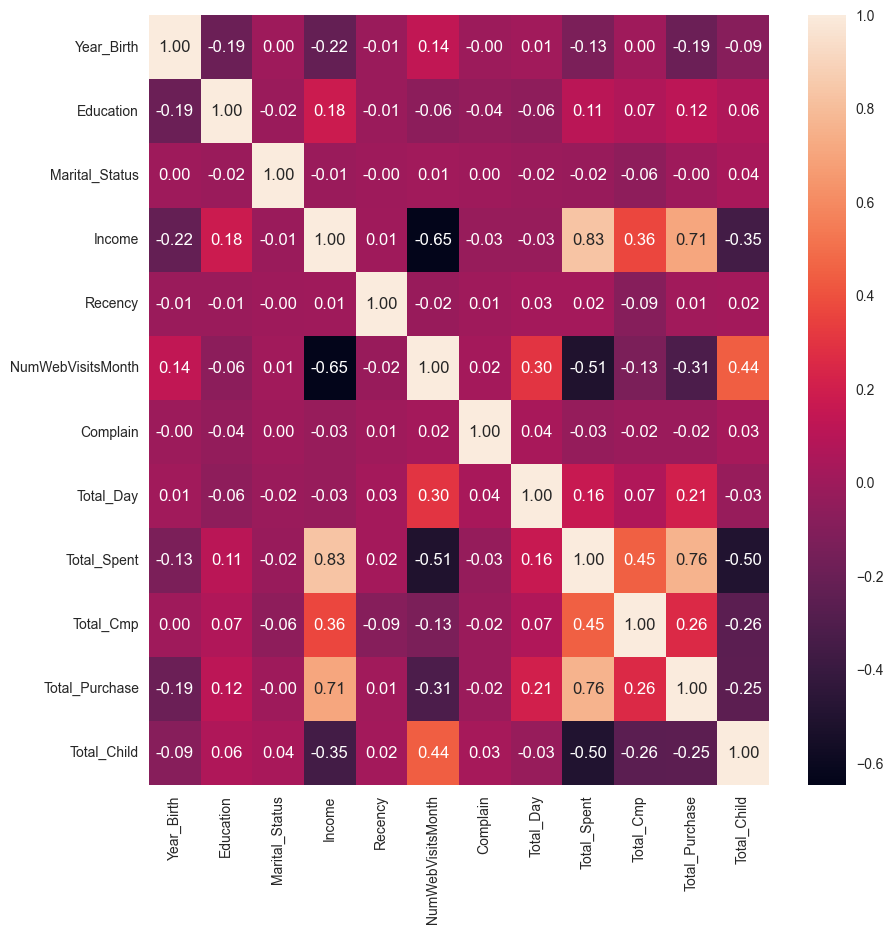

In [51]:
plt.figure(figsize=[10, 10])
sns.heatmap(df_reviewed.corr(), annot=True, fmt='.2f')
plt.show()

Dari heatmap tersebut kita bisa simpulkan bahwa:
1. Kolom `Marital_Status`, `Recency`, dan `Complain` **tidak memiliki korelasi** sama sekali dengan kolom lain.
2. Kolom `Income` dan `Total_Spent` **memiliki korelasi yang sangat tinggi** hingga mencapai `0.83`.

Kolom-kolom yang sudah saya sebutkan dapat menyebabkan masalah pada model, maka sebaiknya kita bersihkan dahulu.

In [52]:
df_reviewed = df_reviewed.drop(columns=['Marital_Status', 'Recency', 'Complain', 'Total_Spent'])
df_reviewed

,Year_Birth,Education,Income,NumWebVisitsMonth,Total_Day,Total_Cmp,Total_Purchase,Total_Child
0,1957,2,58138.0,7,663,1.0,25.0,0.0
1,1954,2,46344.0,5,113,0.0,6.0,2.0
2,1965,2,71613.0,4,312,0.0,21.0,0.0
3,1984,2,26646.0,6,139,0.0,8.0,1.0
4,1981,4,58293.0,5,161,0.0,19.0,1.0
...,...,...,...,...,...,...,...,...
2188,1967,2,61223.0,5,381,0.0,18.0,1.0
2189,1946,4,64014.0,7,19,1.0,22.0,3.0
2190,1981,2,56981.0,6,155,1.0,19.0,0.0
2191,1956,3,69245.0,3,156,0.0,23.0,1.0


## Scaling

Terakhir kita akan melakukan standarisasi.

In [53]:
scaler    = StandardScaler()
df_scaled = df_reviewed.copy()

In [54]:
df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled)
df_scaled

,Year_Birth,Education,Income,NumWebVisitsMonth,Total_Day,Total_Cmp,Total_Purchase,Total_Child
0,-1.016047,-0.454684,0.311046,0.744232,1.526470,0.617593,1.333731,-1.270185
1,-1.272830,-0.454684,-0.264314,-0.130186,-1.192386,-0.503583,-1.174510,1.401773
2,-0.331292,-0.454684,0.968412,-0.567395,-0.208654,-0.503583,0.805681,-1.270185
3,1.294999,-0.454684,-1.225263,0.307023,-1.063858,-0.503583,-0.910484,0.065794
4,1.038216,1.537568,0.318608,-0.130186,-0.955104,-0.503583,0.541655,0.065794
...,...,...,...,...,...,...,...,...
2188,-0.160104,-0.454684,0.461545,-0.130186,0.132439,-0.503583,0.409643,0.065794
2189,-1.957584,1.537568,0.597702,0.744232,-1.657063,0.617593,0.937693,2.737752
2190,1.038216,-0.454684,0.254603,0.307023,-0.984764,0.617593,0.541655,-1.270185
2191,-1.101641,0.541442,0.852891,-1.004604,-0.979821,-0.503583,1.069706,0.065794


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Kita akan melakukan prediksi dengan 3 data, yaitu data yang sudah distandarisasi, belum distandarisasi, dan belum review.

In [55]:
def getSilhoutteScore(df_predict):
    result = []
    for n_clusters in range(2, 11):
        y_silhouette = KMeans(n_clusters=n_clusters, random_state=42).fit_predict(df_predict)
        result.append(silhouette_score(df_predict, y_silhouette))
    return result

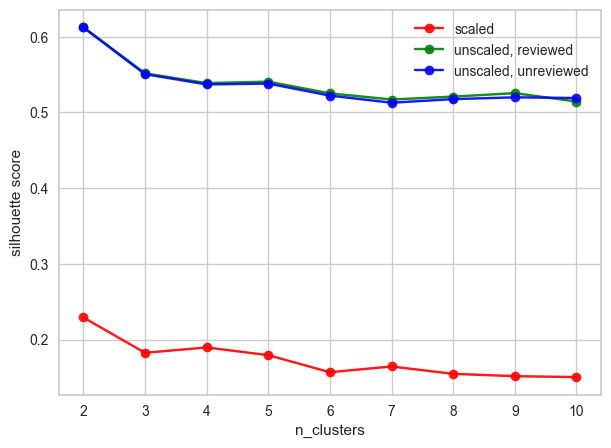

In [56]:
plt.figure(figsize=[7, 5])
for i, df_predict in enumerate([df_scaled, df_reviewed, df_encoded]):
    plt.plot(
        range(2, 11), getSilhoutteScore(df_predict),
        marker = 'o',
        alpha  = 0.9,
        color  = ['red', 'green', 'blue'][i],
        label  = ['scaled', 'unscaled, reviewed', 'unscaled, unreviewed'][i]
    )

plt.legend()
plt.xlabel('n_clusters')
plt.ylabel('silhouette score')
plt.show()

Dalam grafik tersebut menunjukkan bahwa:
1. Data yang sudah di standarisasi memiliki skor silhouette terendah karena data hilangnya variasi data.
2. Data yang sudah di review atau dibersihkan memiliki skor silhouette yang mirip, tetapi data yang sudah direview memiliki skor yang lebih baik.

Maka dari itu kita akan menggunakan data yang sudah di review, tetapi belum distandarisasi.

## **b. Evaluasi Model Clustering**

Mari kita lihat bagaimana metode elbow menentukan clusternya.

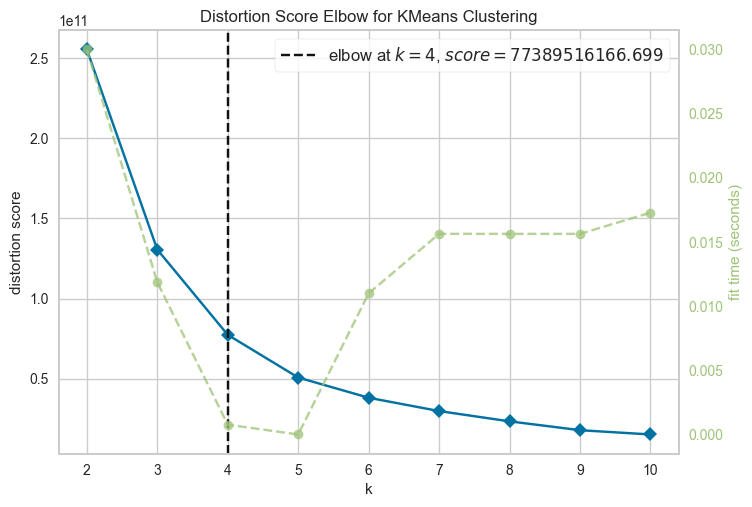

In [57]:
elbow = KElbowVisualizer(KMeans(), k=10)
elbow.fit(df_reviewed)
elbow.show()
plt.show()

Metode elbow menunjukkan bahwa jumlah cluster terbaik adalah 4.

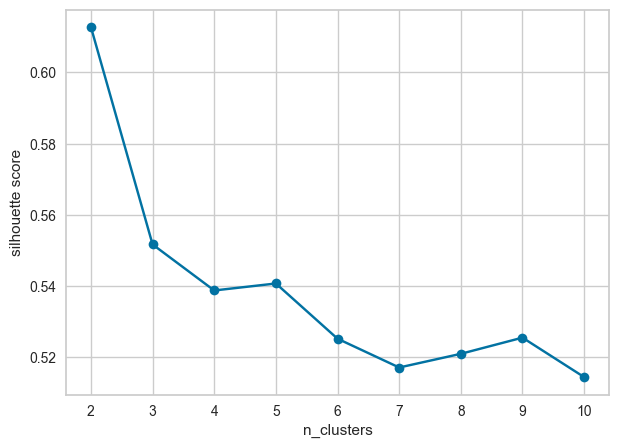

In [58]:
plt.figure(figsize=[7, 5])
plt.plot(range(2, 11), getSilhoutteScore(df_reviewed), marker = 'o')

plt.xlabel('n_clusters')
plt.ylabel('silhouette score')
plt.show()

Sedangkan jumlah cluster dengan skor silhouette terbaik adalah 2, 3, dan 5. Untuk mendapatkan nilai elbow terbaik dan silhoutte terbaik maka kita akan menggunakan 5 cluster.

In [59]:
kmeans  = KMeans(n_clusters=5, random_state=42)
y_final = kmeans.fit_predict(df_reviewed)

In [60]:
silhouette_score(df_reviewed, y_final)

np.float64(0.5406920739956786)

## **c. Feature Selection (Opsional)**

Seperti yang sudah dilihat sebelumnya. Pada saya telah melakukan salah satu feature selection yaitu korelasi yang tinggi dan tidak berkorelasi sama sekali. Lalu saya sudah membandingkan keduanya pada grafik sebelumnya dengan 3 dataframe lainnya.

Mungkin kita bisa melakukan feature selection tambahan dengan varians.

In [61]:
df_fselected = df_encoded.drop(columns=['Total_Spent'])
selector     = VarianceThreshold(threshold=0.8)
selector.fit(df_fselected)
df_fselected = df_fselected[df_fselected.columns[selector.get_support()]]

df_fselected.columns

Index(['Year_Birth', 'Education', 'Income', 'Recency', 'NumWebVisitsMonth',
       'Total_Day', 'Total_Purchase'],
      dtype='object')

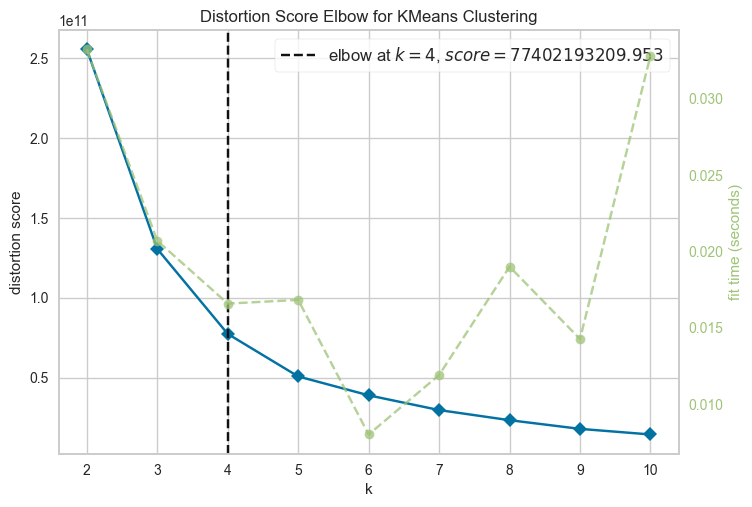

In [62]:
elbow = KElbowVisualizer(KMeans(), k=10)
elbow.fit(df_fselected)
elbow.show()
plt.show()

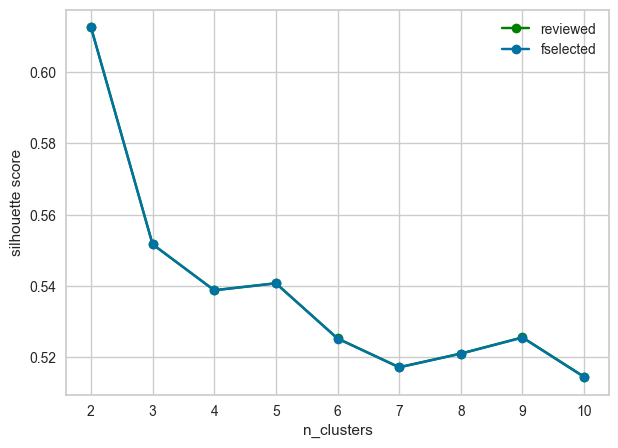

In [63]:
plt.figure(figsize=[7, 5])
plt.plot(range(2, 11), getSilhoutteScore(df_reviewed), marker = 'o', label='reviewed', color='green')
plt.plot(range(2, 11), getSilhoutteScore(df_fselected), marker = 'o', label='fselected')

plt.xlabel('n_clusters')
plt.ylabel('silhouette score')
plt.legend()
plt.show()

Terlihat bahwa tidak ada perbedaan yang signifikan antara data yang di lakukan feature selection dengan data yang sudah saya review. Terlihat bahwa jumlah cluster dari 2 sampai 5 memiliki skor silhouette yang sama. Tetapi jika kita tidak mengatur `random_state` maka mereka akan membalap skor satu sama lain setelah 5 cluster. Karena kita akan menggunakan 5 cluster maka memakai salah satu dari kedua dataframe tersebut tidak apa.

**PERHATIAN**

Dataset tidak memiliki variasi yang dapat menciptakan pola dengan silhouette yang baik. Oleh karena itu skor silhouette adalah 0.54 kurang dari 0.7 seperti yang disarankan. Saya telah menggunakan berbagai cara tetapi tidak juga bisa melebihi 0.7, salah satunya dengan mengotak-atik alur preprocessing, menggunakan kolom yang berbeda, menggunakan data distandarisasi dan tidak, dan lain-lain.

## **d. Visualisasi Hasil Clustering**

Setelah itu mari kita lihat bagaimana cluster membagi data kita.

In [64]:
df_clustered = df_reviewed.copy()
df_clustered['Cluster'] = y_final

In [65]:
def scatter(x, y='Income'):
    plt.scatter(df_clustered[x], df_clustered[y], c=df_clustered.Cluster, cmap='viridis', alpha=0.6)
    plt.ylabel(y)
    plt.xlabel(x)
    plt.colorbar(label='Cluster')
    plt.show()

In [66]:
df_clustered.Cluster.value_counts()

Cluster
1    515
3    493
4    478
0    366
2    341
Name: count, dtype: int64

Pertama mari kita lihat menggunakan PCA.

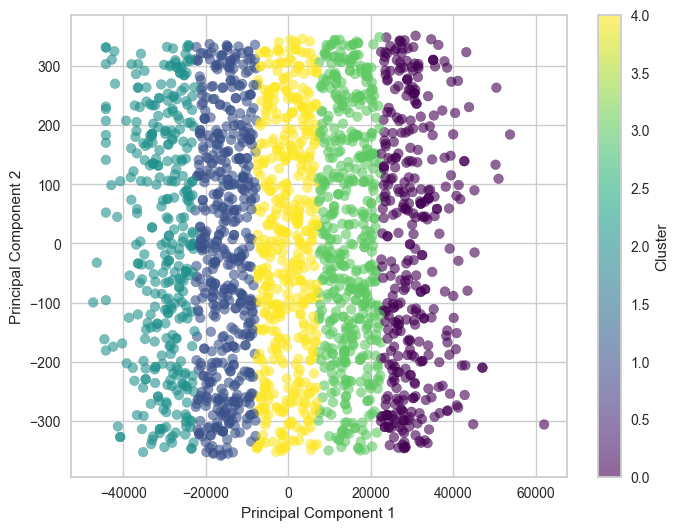

In [67]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_reviewed)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_clustered.Cluster, cmap='viridis', alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()

Terlihat bahwa pengelompokan data menjadi 5 cluster sudah cukup baik

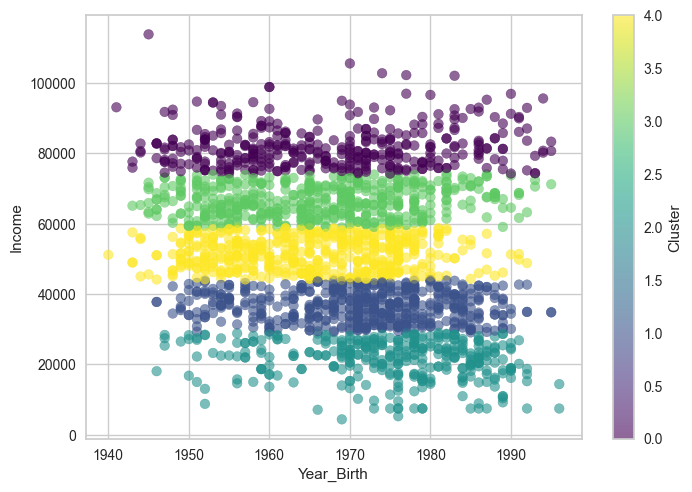

In [68]:
scatter('Year_Birth')

KMeans mengelompokan data berdasarkan pendapatannya, tetapi tidak berurutan dengan label clusternya. Mari kita coba untuk mengurutkannya.

In [69]:
df_clustered.Cluster = df_clustered.Cluster.map({0: 4, 1: 1, 2: 0, 3: 3, 4: 2})

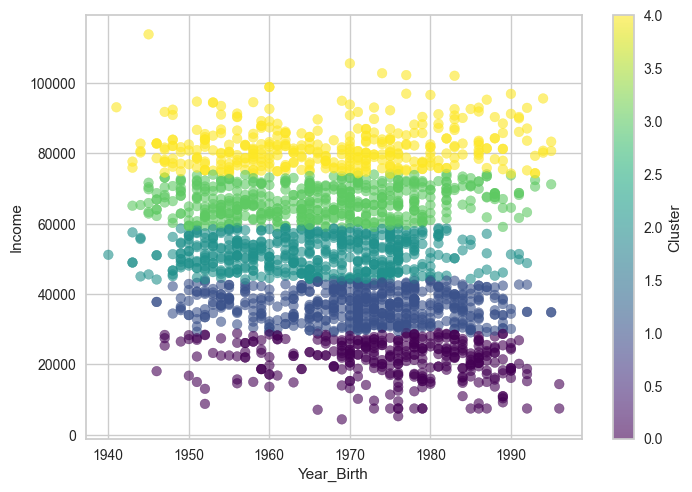

In [70]:
scatter('Year_Birth')

Seperti yang dilihat sudah terurut dengan baik.

### Visualize

Mari kita lihat lagi korelasi antar kolom untuk menentukan apa yang perlu divisualisasikan.

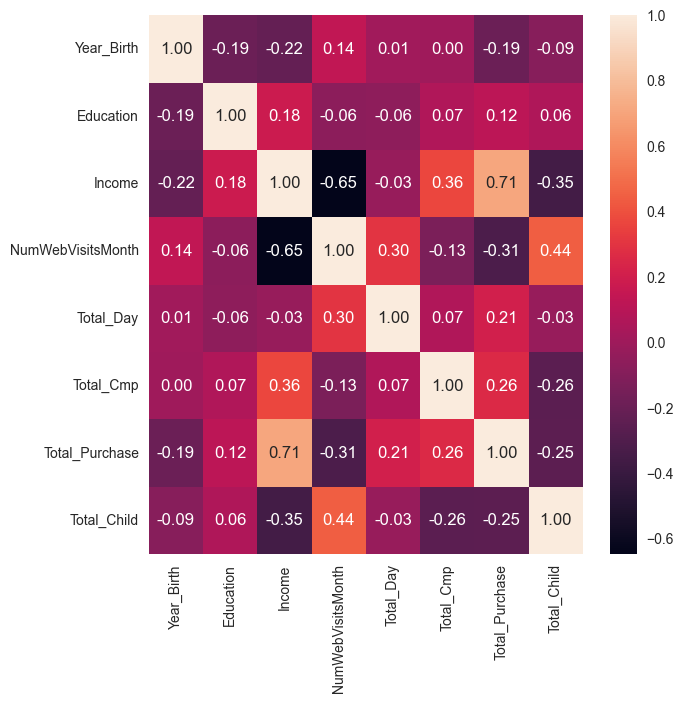

In [71]:
plt.figure(figsize=[7, 7])
sns.heatmap(df_reviewed.corr(), annot=True, fmt='.2f')
plt.show()

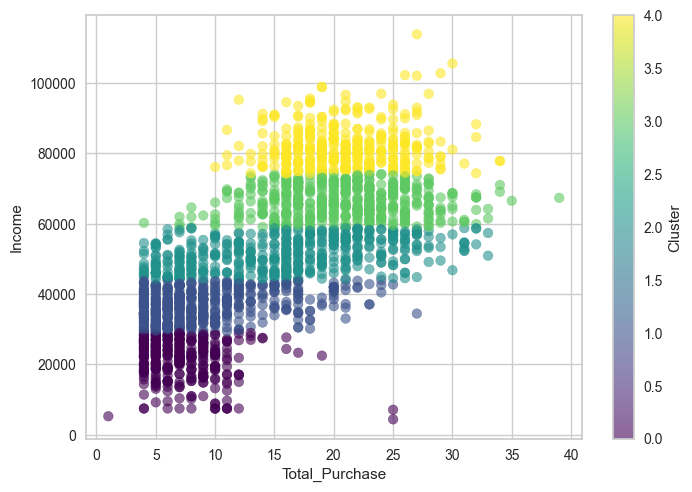

In [72]:
scatter('Total_Purchase')

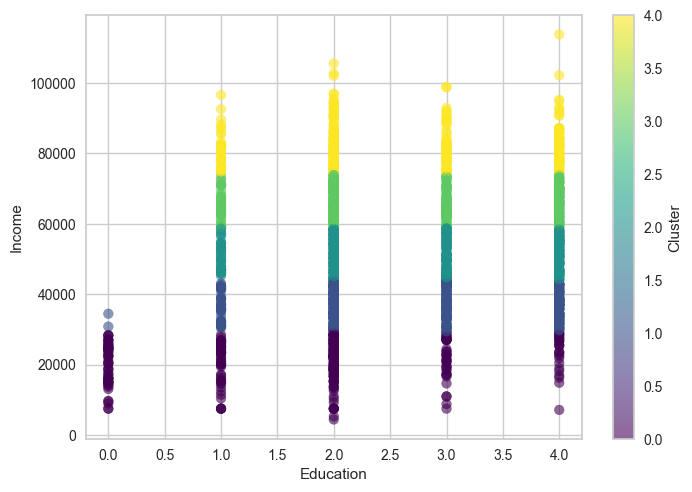

In [73]:
scatter('Education')

Dengan ini kita bisa lihat bahwa semakin tinggi angka cluster maka semakin banyak pendapatan dan pengeluarannya.

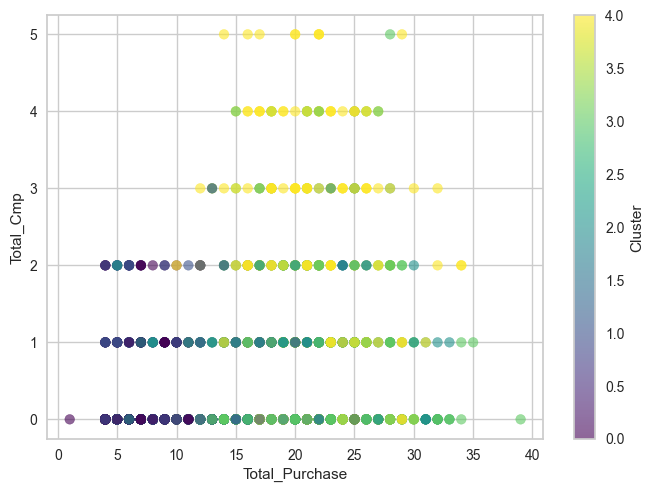

In [74]:
scatter('Total_Purchase', 'Total_Cmp')

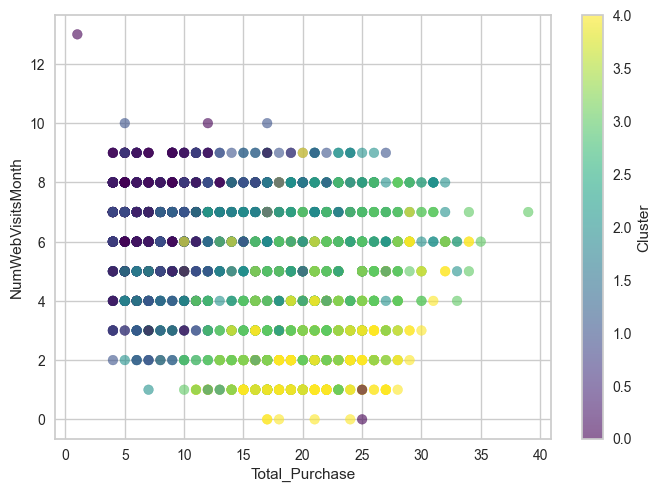

In [75]:
scatter('Total_Purchase', 'NumWebVisitsMonth')

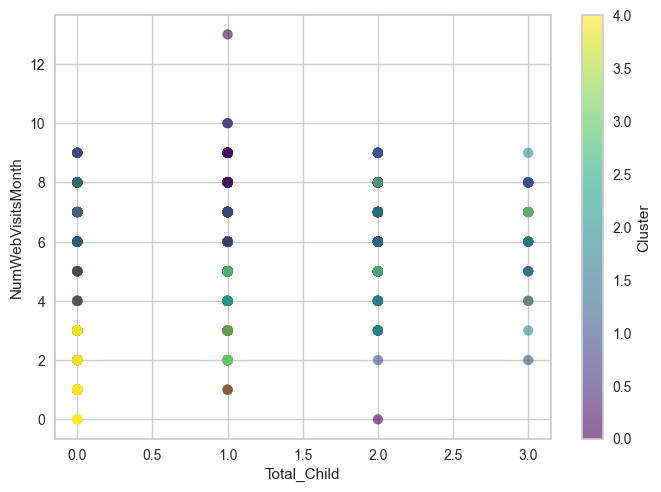

In [76]:
scatter('Total_Child', 'NumWebVisitsMonth')

## **e. Analisis dan Interpretasi Hasil Cluster**

### Inverse

In [77]:
df_final = df_cleaned[df_reviewed.columns]
df_final['Cluster'] = df_clustered.Cluster
df_final

,Year_Birth,Education,Income,NumWebVisitsMonth,Total_Day,Total_Cmp,Total_Purchase,Total_Child,Cluster
0,1957,Graduation,58138.0,7,663,1.0,25.0,0.0,2
1,1954,Graduation,46344.0,5,113,0.0,6.0,2.0,2
2,1965,Graduation,71613.0,4,312,0.0,21.0,0.0,3
3,1984,Graduation,26646.0,6,139,0.0,8.0,1.0,0
4,1981,PhD,58293.0,5,161,0.0,19.0,1.0,2
...,...,...,...,...,...,...,...,...,...
2188,1967,Graduation,61223.0,5,381,0.0,18.0,1.0,3
2189,1946,PhD,64014.0,7,19,1.0,22.0,3.0,3
2190,1981,Graduation,56981.0,6,155,1.0,19.0,0.0,2
2191,1956,Master,69245.0,3,156,0.0,23.0,1.0,3


### Interpretasi

In [78]:
def describe(cluster):
    for col in df_final.select_dtypes(include=['int64', 'float64']):
        print(f'- Rata-rata **{col}**: `{df_final[df_final.Cluster == cluster][col].mean():.2f}`')

def education(cluster):
    return df_final[df_final.Cluster == cluster].Education.value_counts()

#### Cluster 0:

In [79]:
describe(0)

- Rata-rata **Year_Birth**: `1974.95`
- Rata-rata **Income**: `21441.62`
- Rata-rata **NumWebVisitsMonth**: `6.90`
- Rata-rata **Total_Day**: `368.02`
- Rata-rata **Total_Cmp**: `0.18`
- Rata-rata **Total_Purchase**: `7.29`
- Rata-rata **Total_Child**: `0.94`
- Rata-rata **Cluster**: `0.00`


In [80]:
education(0)

Education
Graduation    176
Basic          52
2n Cycle       52
Master         36
PhD            25
Name: count, dtype: int64

- Rata-rata **Year_Birth**: `1974.95`
- Rata-rata **Income**: `21441.62`
- Rata-rata **NumWebVisitsMonth**: `6.90`
- Rata-rata **Total_Day**: `368.02`
- Rata-rata **Total_Cmp**: `0.18`
- Rata-rata **Total_Purchase**: `7.29`
- Rata-rata **Total_Child**: `0.94`
- **Education** diatas **Graduation**: `61`
- Analisis: Cluster ini mencakup pelanggan dengan pendapatan yang paling rendah dari yang lainnya. Karena pendapatannya yang paling rendah itu berpengaruh pada penerimaan kampanye dan pembelian barang yang membuatnya juga rendah, tapi membuatnya sering mengunjungi website. Ini mungkin disebabkan oleh karena tahun lahirnya yang membuatnya lebih muda dari yang lainnya. Ini adalah cluster dengan pendidikan basic terbanyak.

#### Cluster 1:

In [81]:
describe(1)

- Rata-rata **Year_Birth**: `1971.45`
- Rata-rata **Income**: `36653.10`
- Rata-rata **NumWebVisitsMonth**: `6.63`
- Rata-rata **Total_Day**: `350.36`
- Rata-rata **Total_Cmp**: `0.23`
- Rata-rata **Total_Purchase**: `9.14`
- Rata-rata **Total_Child**: `1.30`
- Rata-rata **Cluster**: `1.00`


In [82]:
education(1)

Education
Graduation    260
PhD           116
Master         97
2n Cycle       40
Basic           2
Name: count, dtype: int64

- Rata-rata **Year_Birth**: `1971.45`
- Rata-rata **Income**: `36653.10`
- Rata-rata **NumWebVisitsMonth**: `6.63`
- Rata-rata **Total_Day**: `350.36`
- Rata-rata **Total_Cmp**: `0.23`
- Rata-rata **Total_Purchase**: `9.14`
- Rata-rata **Total_Child**: `1.30`
- **Education** diatas **Graduation**: `213`
- Analisis: Cluster ini mencakup pelanggan dengan pendapatan yang lebih baik daripada cluster 0. Karena pendapatannya yang meningkat itu berpengaruh pada penerimaan kampanye dan pembelian barang yang membuatnya juga meningkat, tapi menurunnya pengunjungan website. Cluster ini memiliki tanggal lahir yang lebih tua dan juga memiliki jumlah anak yang lebih tinggi dari cluster sebelumnya. Ini adalah cluster terakhir yang memiliki pendidikan basic didalamnya

#### Cluster 2:

In [83]:
describe(2)

- Rata-rata **Year_Birth**: `1965.40`
- Rata-rata **Income**: `51425.76`
- Rata-rata **NumWebVisitsMonth**: `5.83`
- Rata-rata **Total_Day**: `351.40`
- Rata-rata **Total_Cmp**: `0.31`
- Rata-rata **Total_Purchase**: `15.91`
- Rata-rata **Total_Child**: `1.27`
- Rata-rata **Cluster**: `2.00`


In [84]:
education(2)

Education
Graduation    220
PhD           129
Master         91
2n Cycle       38
Name: count, dtype: int64

- Rata-rata **Year_Birth**: `1965.40`
- Rata-rata **Income**: `51425.76`
- Rata-rata **NumWebVisitsMonth**: `5.83`
- Rata-rata **Total_Day**: `351.40`
- Rata-rata **Total_Cmp**: `0.31`
- Rata-rata **Total_Purchase**: `15.91`
- Rata-rata **Total_Child**: `1.27`
- **Education** diatas **Graduation**: `240`
- Analisis: Cluster ini memiliki kenaikan pendapatan yang signifikan daripada cluster sebelumnya, dan seperti biasa dikarenakan pendapatannya yang meningkat itu berpengaruh pada penerimaan kampanye dan pembelian barang yang membuatnya juga meningkat, tapi menurunnya pengunjungan website. Cluster ini memiliki tahun lahir yang lebih tua 6 tahun dari cluster sebelumnya, yang mana hanya turun 4 tahun.

#### Cluster 3:

In [85]:
describe(3)

- Rata-rata **Year_Birth**: `1966.37`
- Rata-rata **Income**: `66428.36`
- Rata-rata **NumWebVisitsMonth**: `4.20`
- Rata-rata **Total_Day**: `365.75`
- Rata-rata **Total_Cmp**: `0.41`
- Rata-rata **Total_Purchase**: `20.72`
- Rata-rata **Total_Child**: `0.76`
- Rata-rata **Cluster**: `3.00`


In [86]:
education(3)

Education
Graduation    259
PhD           121
Master         77
2n Cycle       36
Name: count, dtype: int64

- Rata-rata **Year_Birth**: `1966.37`
- Rata-rata **Income**: `66428.36`
- Rata-rata **NumWebVisitsMonth**: `4.20`
- Rata-rata **Total_Day**: `365.75`
- Rata-rata **Total_Cmp**: `0.41`
- Rata-rata **Total_Purchase**: `20.72`
- Rata-rata **Total_Child**: `0.76`
- **Education** diatas **Graduation**: `198`
- Analisis: Cluster ini memiliki kenaikan pendapatan. Tetapi uniknya cluster ini memiliki pendidikan yang lebih rendah dan memiliki tahun lahir yang lebih muda daripada cluster sebelumnya. Cluster ini juga memiliki penurunan pada jumlah anak secara signifikan.

#### Cluster 4:

In [87]:
describe(4)

- Rata-rata **Year_Birth**: `1967.47`
- Rata-rata **Income**: `81954.91`
- Rata-rata **NumWebVisitsMonth**: `2.71`
- Rata-rata **Total_Day**: `334.89`
- Rata-rata **Total_Cmp**: `1.25`
- Rata-rata **Total_Purchase**: `20.93`
- Rata-rata **Total_Child**: `0.31`
- Rata-rata **Cluster**: `4.00`


In [88]:
education(4)

Education
Graduation    192
PhD            82
Master         60
2n Cycle       32
Name: count, dtype: int64

- Rata-rata **Year_Birth**: `1967.47`
- Rata-rata **Income**: `81954.91`
- Rata-rata **NumWebVisitsMonth**: `2.71`
- Rata-rata **Total_Day**: `334.89`
- Rata-rata **Total_Cmp**: `1.25`
- Rata-rata **Total_Purchase**: `20.93`
- Rata-rata **Total_Child**: `0.31`
- **Education** diatas **Graduation**: `142`
- Analisis: Cluster ini adalah cluster terakhir, yang mana memiliki pendapatan tertinggi diantara cluster lain. Cluster ini memiliki kenaikan pembelian yang sangat rendah daripada cluster sebelumnya, tetapi memiliki kenaikan penerimaan kampanye yang sangat signifikan daripada cluster sebelumnya. Cluster ini juga cluster ini memiliki pendidikan yang lebih rendah dan memiliki tahun lahir yang lebih muda daripada cluster sebelumnya.

# **7. Mengeksport Data**

In [89]:
df_final.to_csv('dataset/marketing_campaign_labeled.csv')